# Open AI gym example
This code shows the use of open AI with chaos theory. Using to explore chaotic control of motors.

Code by Dexter R. Shepherd

### Section 1
Creating the open AI gym simulation

In [1]:
import sys
import gym
from gym import logger as gymlogger
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import random
from copy import deepcopy as dc
import math as maths

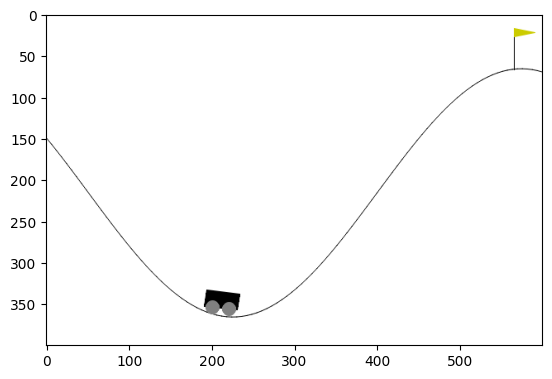

In [2]:
SIM='MountainCar-v0'

genotype=np.array([random.randint(0,2) for i in range(100)])
def run_trial(genotype,num_trials,show=True):
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    assert len(genotype)>=num_trials, "Make sure the num_trials is not greater than your genotype size"
    observations=[]
    totalFit=-100
    best_obvs=[]
    for _ in range(num_trials):
        action = int(genotype[_])
        observation, reward, terminated, truncated, info = env.step(action) #step through with each action
        rewards+=reward
        observations.append(fitness(observation))
        if terminated or truncated: #environment finished
            observation, info = env.reset()
            if sum(observations)>=totalFit: #save best observaations
                totalFit=sum(observation)
                best_obvs=dc(observations) #copy obs
            observations=[]
    endObs=observation
    if show:
        return rewards,endObs,env.render()
    env.close()
    endObs=observation
    return rewards,best_obvs

def fitness(observation):
    best=[0.6, 0.07]
    worst=[-1.2, -0.07]
    return ((observation[0]))/(best[0]+abs(worst[0]))#*0.5 + (abs(observaion[])/(best[1]+abs(worst[1])))*0.5

def visualise(genotype,num_trials):
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    assert len(genotype)>=num_trials, "Make sure the num_trials is not greater than your genotype size"
    for _ in range(num_trials):
        #action = env.action_space.sample()
        action = int(genotype[_])
        observation, reward, terminated, truncated, info = env.step(action)
        rewards+=reward
        plt.imshow(env.render())
        plt.pause(0.05)
        if terminated or truncated:
            observation, info = env.reset()
    env.close()
    return rewards
def visualise_best(genotype,num_trials):
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    assert len(genotype)>=num_trials, "Make sure the num_trials is not greater than your genotype size"
    observations=[]
    totalFit=-100
    best_obvs=dc(env.render())
    for _ in range(num_trials):
        action = int(genotype[_])
        observation, reward, terminated, truncated, info = env.step(action) #step through with each action
        rewards+=reward
        observations.append(fitness(observation))
        if terminated or truncated: #environment finished
            if sum(observations)>=totalFit: #save best observaations
                totalFit=sum(observation)
                best_obvs=dc(env.render()) #copy obs
            observation, info = env.reset()
            observations=[]
    endObs=observation
    env.close()
    endObs=observation
    return best_obvs

c=visualise_best(genotype,100)
plt.imshow(c)
plt.show()


### Section 2

Chaotic model

Using the Lorenze attractor we have oscilation movement with respect to time (T). 

$\dot{x} = \sigma (y-x)$

$\dot{y} = x ( \rho - z)-y$

$\dot{z} = xy - \beta z$

Three empty numpys of size n are used to store each iteration time step of the lorenze attractor.

$x \in \{0,...,n\},y \in \{0,...,n\},z \in \{0,...,n\}$

$\beta $ represents the geometry factor, aspect ratio of the box. The smaller it is, the more it fits within the sizing. 
$\sigma$ represents the prandtl number - ratio of momentum diffusing. 
$\rho$ represents the rayleigh number - dimentionaless numbe associated with buoyancy-driven flow. 

In 3D we have a chaotic model looking like the following:

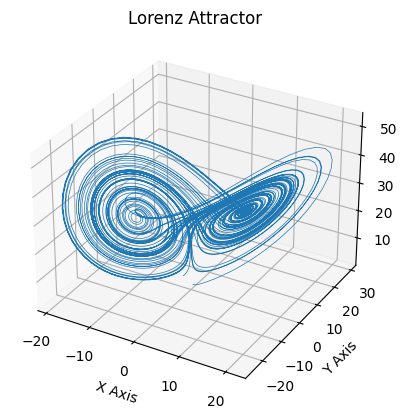

In [3]:
prandtl = 10 
rho = 28
beta = 8/3

def lorenz_attr(x, y, z):
    x_dot = prandtl*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz_attr(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

Plotting this as a 2D plot. By investigating the parameters, it is found that as $\rho < 1$ (0,0,0) is a unique state, but as $\rho > 1$ two steady states bifuricate from the source. This creating the values (for a 2D axis)
$(\pm \sqrt{\beta (\rho - 1)},\pm \sqrt{\beta (\rho - 1)}) $

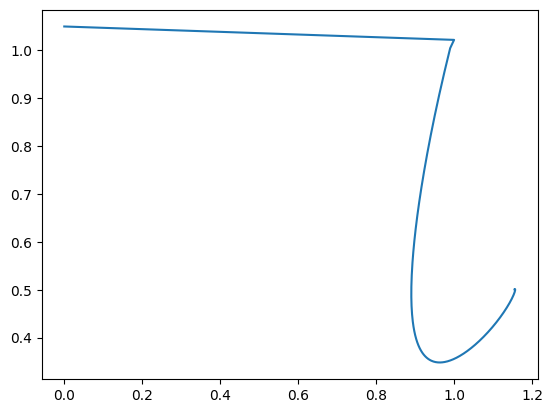

In [4]:
prandtl = 100
rho = 1.5
beta = 8/3

def lorenz_attr(x, y, z):
    x_dot = prandtl*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz_attr(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
plt.plot(xs,zs)

plt.show()

Plotting this as the veloicities in each axis

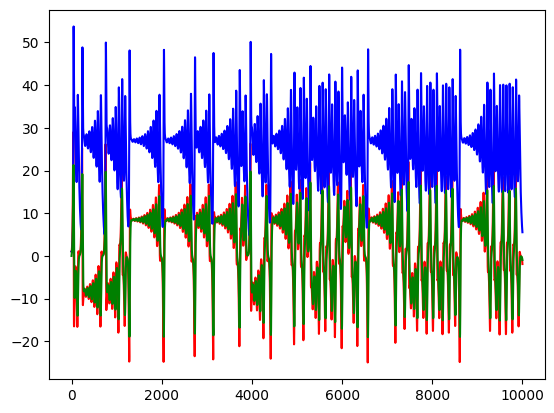

In [5]:
prandtl = 10
rho = 28
beta = 8/3

def lorenz_attr(x, y, z):
    x_dot = prandtl*(y - x)
    y_dot = rho*x - y - x*z
    z_dot = x*y - beta*z
    return x_dot, y_dot, z_dot
def get_velocities(prandtl,rho,beta):
    dt = 0.01
    num_steps = 10000

    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz_attr(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs,ys,zs

xs,ys,zs=get_velocities(prandtl,rho,beta)
fig = plt.figure()
plt.plot(ys,c="r")
plt.plot(zs,c="b")
plt.plot(xs,c="g")
plt.show()

Converting the signal from velocities to the state actions of the open ai gym

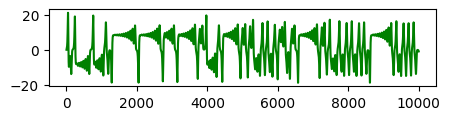

Convert to decision signal


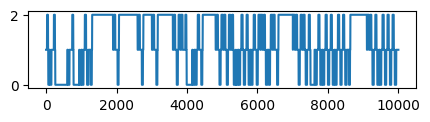

Convert to scale decision


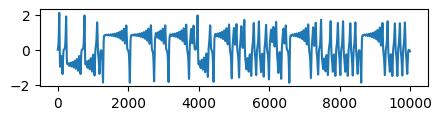

In [6]:
prandtl = 10
rho = 28
beta = 8/3

def convert(signal,val=5):
    #make threshold with val and create a signal based off of the chaotic one
    new=np.zeros(signal.shape)
    new[np.argwhere(signal<=(val*-1))]=0
    new[np.argwhere(signal>(val*-1))]=1
    new[np.argwhere(signal>val)]=2 #set by threshold
    return new

def convert_scale(signal,val=4,neg=True):
    #make threshold with val and create a signal based off of the chaotic one
    ma=np.max(signal)
    mi=0
    if neg:
        mi=np.min(signal)
    scaler=val/(ma+abs(mi)) #reduce by scaler
    return signal*scaler
xs,ys,zs=get_velocities(prandtl,rho,beta)

xs,ys,zs=get_velocities(prandtl,rho,beta)
fig = plt.figure(figsize=(5,1))
plt.plot(xs,c="g")
plt.show()
print("Convert to decision signal")
plt.figure(figsize=(5,1))
plt.plot(convert(xs,val=5))
plt.show()
print("Convert to scale decision")
plt.figure(figsize=(5,1))
plt.plot(convert_scale(xs,val=4))
plt.show()

## Section 3

Using the chaos signals to control the simulation. The first example makes use of a pre-generated signal with a grid-search method



Reward sum: -43.29050893610755


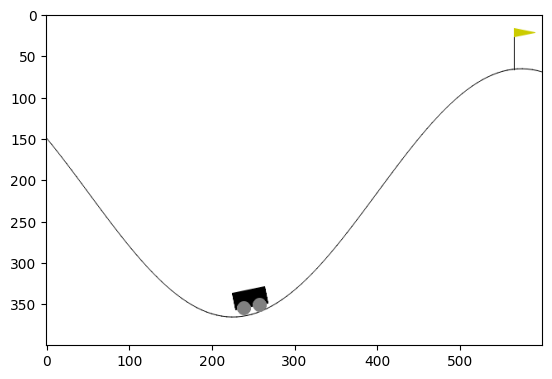

In [7]:
def fitness(observation): #get the fitness based on how far along the plane it is
    best=[0.6, 0.07]
    worst=[-1.2, -0.07]
    return ((observation[0]))/(best[0]+abs(worst[0]))#*0.5 + (abs(observaion[])/(best[1]+abs(worst[1])))*0.5

prandtl = 10
rho = 28
beta = 8/3 
GEN=500
best=-100
best_chaotic=None
#loop through diffrent parameters
for rho in range(30):
    for prandtl in range(0,10):
        xs,ys,zs=get_velocities(prandtl,rho,beta) #gather the generated velocities from the chaotic parameters
        geno=convert(xs,val=5) #get in correct format
        reward,obs=run_trial(geno,GEN,show=False) #run a simulated trial
        reward=sum(obs)
        if reward>=best:
            best=reward
            best_chaotic=dc(geno) #deep copy the genotype
print("Reward sum:",best)
#reward=run_trial(best_chaotic,100)
im=visualise_best(best_chaotic,100)
plt.imshow(im)
plt.show()

## Section 4 

BVP signal

The equations are taken from the paper 'Response characteristics of the BVP neuron model to periodic pulse inputs'. This has been modiefied to have two parameters, c and a. c was already a paramter, but a was added to the y axis. 

$\ddot{x} = c(1-x^{2})(y-\frac{cx^{3}}{3}+cx)-x$

$\ddot{y} = -x\times a$

The secion of the equation $(y-\frac{cx^{3}}{3}+cx)$ can be written as $\dot{x}$ which is part of our lienard transformation.

[]

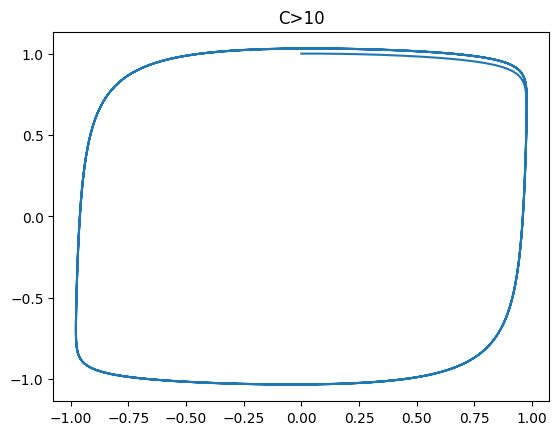

In [8]:
size=1000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=4
a=3
#b=100

dt=0.005
x_[0], y_[0] = (0., 1.)

def bvp(x,y):
    x_d=c*(x-(x**3)/3 + y)
    xs=c*(1-x**2)*x_d - x
    #ys = -1* (x+b*y -a)/c
    ys=-x*a
    return x+xs*dt, y+ys*dt

for i in range(size-1):
    x_dot, y_dot=bvp(x_[i],y_[i])
    x_[i + 1] = x_dot
    y_[i + 1] = y_dot
    
plt.plot(x_,y_)
plt.title("C>10")
plt.plot()


We can add a further parameter of rotation around the centre point, which allows more movwment around the search space envrionment.

$\ddot{x}_{i} = \left (\ddot{x}_{i}+(c(1-x_{i}^{2})(y_{i}-\frac{cx_{i}^{3}}{3}+cx_{i})-x)\times dt\right ) \times cos(\theta ) - \left (\ddot{y}_{i}+(-x_{i}\times a\times dt)\right ) \times sin(\theta)$

$\ddot{y}_{i} = \left (\ddot{x}_{i}+(c(1-x_{i}^{2})(y_{i}-\frac{cx_{i}^{3}}{3}+cx_{i})-x)\times dt\right ) \times sin(\theta ) + \left (\ddot{y}_{i}+(-x_{i}\times a\times dt)\right ) \times cos(\theta)$

The equations are currently using the euclidean distance from the centre point (0,0) with a rotation around this axis by $\theta$.

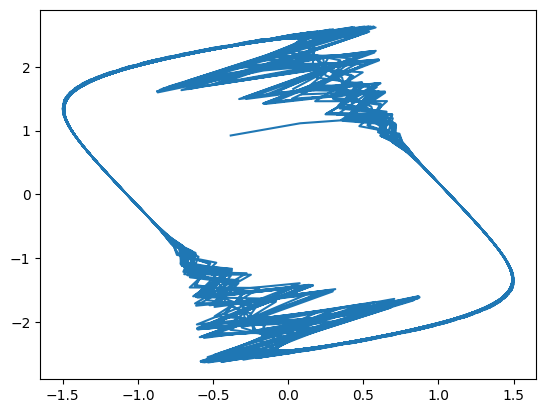

In [9]:
size=1000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=10
a=50
#b=100
theta=maths.pi/8
dt=0.005

def wave_generator(size,theta,a,c,dt,start=(0.,1.)):
    x_=np.zeros((size,))
    y_=np.zeros((size,))

    x_[0], y_[0] = start

    def bvp(x,y):
        x_d=c*(x-(x**3)/3 + y)
        xs=c*(1-x**2)*x_d - x
        #ys = -1* (x+b*y -a)/c
        ys=-x*a
        return xs, ys
    def rotate(x_,y_,theta):
        #rotate points
        for i in range(size):
            x_dot, y_dot=(x_[i],y_[i])
            d=maths.sqrt(x_dot**2 + y_dot**2)
            x_[i] = x_dot*maths.cos(theta) - y_dot*maths.sin(theta)
            y_[i] = y_dot*maths.cos(theta) + x_dot*maths.sin(theta)
        return x_,y_
    
    for i in range(size-1):
        x_dot, y_dot=bvp(x_[i],y_[i])
        x_[i + 1] = x_[i] + (x_dot * dt)
        y_[i + 1] = y_[i] + (y_dot * dt)
    
    #rotate
    x_,y_=rotate(x_,y_,theta)
    return x_,y_

wave_x,wave_y=wave_generator(size,theta,a,c,dt)

plt.plot(wave_x,wave_y)
plt.show()


Converting these points to vectors of movement takes the x-axis (using the pendulum idea). Is is visible that the wave is continous with smaller adjustments over time

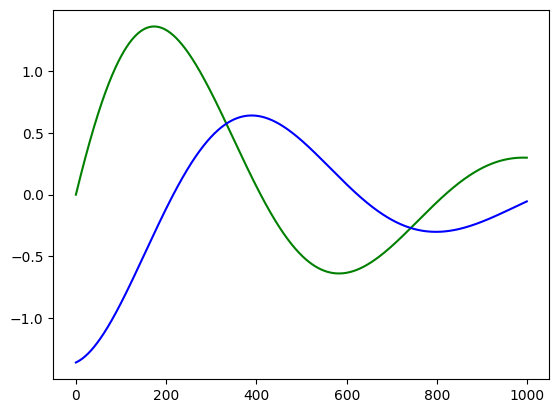

In [10]:
size=1000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=0.5
a=10
#b=100
theta=maths.pi/4
dt=0.005
#create
x_,y_=wave_generator(size,0,a,c,dt)
rotated_x,rotated_y=wave_generator(size,theta,a,c,dt)
#convert 
signal=convert_scale(x_,val=2)
signal2=convert_scale(rotated_x,val=2)
#show
plt.plot(signal,c="g")
plt.plot(signal2,c="b")
plt.show()

## Section 5

Using the bvp chaos signals to control the simulation. The first example makes use of a pre-generated signal with a grid-search method



C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:18: RuntimeWarning: overflow encountered in double_scalars
  x_d=c*(x-(x**3)/3 + y)
C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:18: RuntimeWarning: invalid value encountered in double_scalars
  x_d=c*(x-(x**3)/3 + y)
C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:19: RuntimeWarning: overflow encountered in double_scalars
  xs=c*(1-x**2)*x_d - x
C:\Users\dexte\AppData\Local\Temp\ipykernel_7616\524016157.py:27: RuntimeWarning: overflow encountered in double_scalars
  d=maths.sqrt(x_dot**2 + y_dot**2)


Reward sum: -57.65228418840301


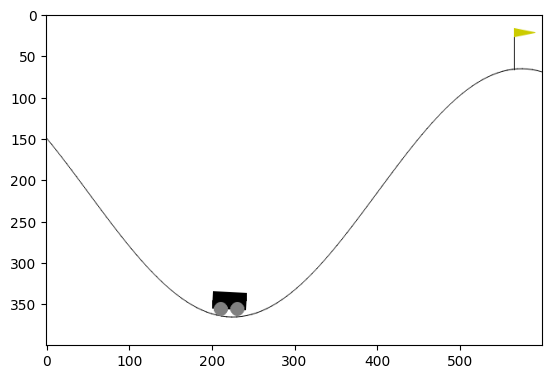

In [11]:
def fitness(observation): #get the fitness based on how far along the plane it is
    best=[0.6, 0.07]
    worst=[-1.2, -0.07]
    return ((observation[0]))/(best[0]+abs(worst[0]))#*0.5 + (abs(observaion[])/(best[1]+abs(worst[1])))*0.5

GEN=500
best=-100
best_chaotic=None
#loop through diffrent parameters
for c in range(1,30):
    #c*=0.1
    for a in range(1,10):
        x_,y_=wave_generator(size,theta,a,c,dt,start=(0.,1.))
        geno=np.rint(convert(x_,val=2))
        #print(geno)
        reward,obs=run_trial(geno,GEN,show=False) #run a simulated trial
        reward=sum(obs)
        if reward>=best:
            best=reward
            best_chaotic=dc(geno) #deep copy the genotype
print("Reward sum:",best)
#reward=run_trial(best_chaotic,100)
im=visualise_best(best_chaotic,100)
plt.imshow(im)
plt.show()

## Section 6

Dynamical signal generation throughout a program


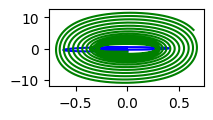

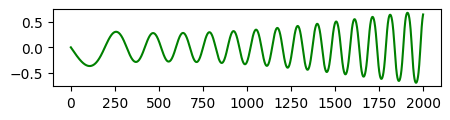

In [12]:
size=2000
x_=np.zeros((size,))
y_=np.zeros((size,))

c=1
a=1
#b=100
theta=maths.pi/1
dt=0.005

x_=np.zeros((size,))
y_=np.zeros((size,))

x_[0], y_[0] = (0.,1.)

def bvp(x,y):
    x_d=c*(x-(x**3)/3 + y)
    xs=c*(1-x**2)*x_d - x
    #ys = -1* (x+b*y -a)/c
    ys=-x*a
    return xs, ys
def rotate(x_,y_,theta):
    #rotate points
    for i in range(size):
        x_dot, y_dot=(x_[i],y_[i])
        d=maths.sqrt(x_dot**2 + y_dot**2)
        x_[i] = x_dot*maths.cos(theta) - y_dot*maths.sin(theta)
        y_[i] = y_dot*maths.cos(theta) + x_dot*maths.sin(theta)
    return x_,y_
def wave_gen_step(x_,y_,i,theta,a,c,dt):
    x_dot, y_dot=bvp(x_[i],y_[i])
    x_[i + 1] = x_[i] + (x_dot * dt)
    y_[i + 1] = y_[i] + (y_dot * dt)
    #rotate
    x_,y_=rotate(x_,y_,theta)
    return x_,y_

wx,wy=wave_generator(size,theta,a,c,dt)
for i in range(size-1):
    x_,y_=wave_gen_step(x_,y_,i ,theta,a,c,dt)
    a+=0.1 #change values throughout the generation
plt.figure(figsize=(2,1))
plt.plot(wx,wy,"b")
plt.plot(x_,y_,"g")
plt.show()
plt.figure(figsize=(5,1))
plt.plot(x_,"g")
plt.show()
np.save("C:/Users/dexte/github/Chaos-Robotics/models/bvp_signal", x_)


Running via C++

This step requires the building of our c++ code. Within ```C++/BVP``` signal you will find the bvp_source.cpp This will need to be built using anaconda.

So the instructions are as follows:

You will need to install the pybind11 library for c++ and python

```pip install pybind11```

You will then want to have a directory of the source file .cpp and a setup.py file. I have attached examples of these files. 

Install anaconda for your local user. https://www.anaconda.com/products/distribution

Open x64 native tools command prompt on windows and navigate to the chosen directory of your code. For me that was 
```C:/users/dexte/source/repos/pytest```
Then type the command activate ```C:/Users/dexte/anaconda``` Of course, your username will be different. It should be stored in your user director if you have installed it correctly. 

Once this is done, within the directory of your code type the command: ```python setup.py develop``` this will build the file and now you can run python test.py to see if you have installed the library correctly


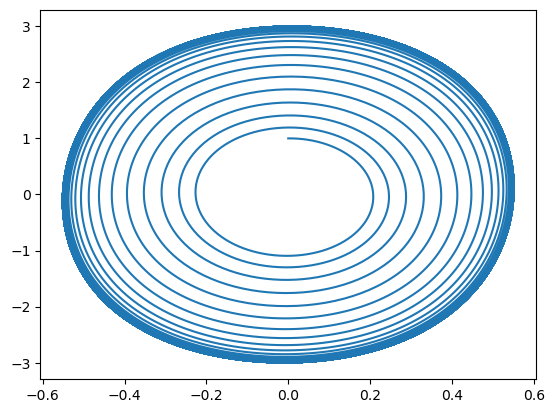

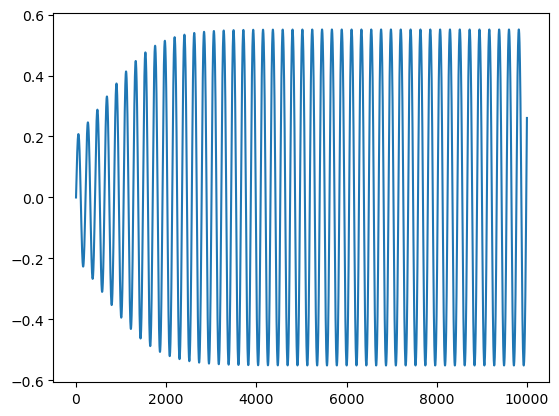

In [19]:
import bvp

class BVP:
    def __init__(self):
        self.b=bvp.BVP()
    def generate(self,size,a,c,dt):
        x=np.asarray(self.b.gen(size,c,a,dt)).view(np.float32)
        x=x.reshape(x.shape[0]//2,2)
        return x
a=30
c=1.1
dt=0.005
SIZE=10000

sig=BVP()
xy=sig.generate(SIZE,a,c,dt)
xs=xy[:,0]
ys=xy[:,1]
plt.plot(xs,ys)
plt.show()
plt.plot(xs)

plt.show()



## Section 7

Modelling reward

The reward is modelled from a sensory signal, that the loss is calculated of. We have our expected sensory value at a time step, and our current sensory signal. We generate a value, $I$ which represents the adapted sensory signal. This takes two parameters a and b that are dynamic variables used to control the homeostatic process.




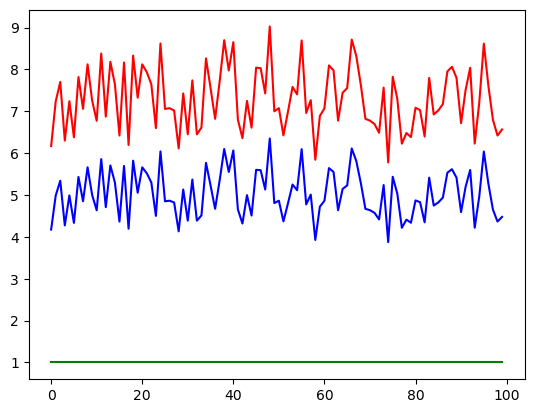

In [29]:
#I=(s[i]-s_hat[i])*maths.log(1+e^(a))+(s_hat[i]+b)

#I is the sensory signal

#s is the sensory signal

#s_hat is the desired outcome

a=1
b=1

def show_gen_control(size,a,b):
    sensory_sig=np.random.normal(5,0.5,(size,))
    sensory_want=np.zeros((size,))+1#np.random.normal(5,0.5,(size,))
    sig=np.zeros((size,))
    plt.plot(sensory_sig,c="b")
    plt.plot(sensory_want,c="g")
    for i in range(size):
        I=(sensory_sig[i]-sensory_want[i])*maths.log(1+(maths.e**(a)))+(sensory_want[i]+b)
        sig[i]=I
    plt.plot(sig,c="r")
    return sig

x=show_gen_control(100,a,b)

plt.show()